In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('gpt_results/output.csv')

In [28]:
df_1 = df[df['mode_size']=='gpt2'].sort_values(by='batch_size')
df_2 = df[df['mode_size']=='gpt2-medium'].sort_values(by='batch_size')
df_3 = df[df['mode_size']=='gpt2-large'].sort_values(by='batch_size')
df_4 = df[df['mode_size']=='gpt2-xl'].sort_values(by='batch_size')

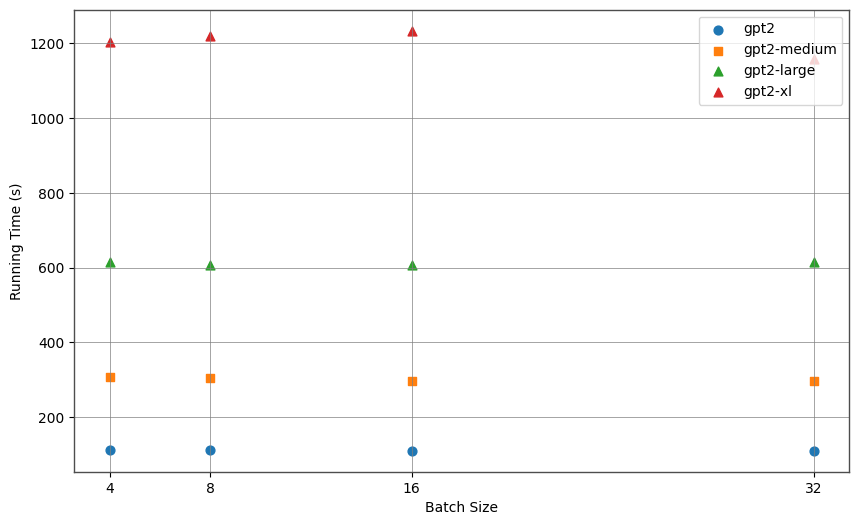

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

x = df_1['batch_size'] // 4

ax.scatter(x, df_1['running_time'], color='#1f77b4', marker='o', s=40, label='gpt2')
ax.scatter(x, df_2['running_time'], color='#ff7f0e', marker='s', s=40, label='gpt2-medium')
ax.scatter(x, df_3['running_time'], color='#2ca02c', marker='^', s=40, label='gpt2-large')
ax.scatter(x, df_4['running_time'], color='#d62728', marker='^', s=40, label='gpt2-xl')

ax.set_xlabel("Batch Size")
ax.set_ylabel('Running Time (s)')

ax.set_xticks([1, 2, 4, 8])  
ax.set_xticklabels(['4','8', '16', '32'])  
ax.grid(True, color='gray', linewidth=0.5)
ax.legend()

for spine in ax.spines.values():
    spine.set_edgecolor('#4D4D4D')  
    spine.set_linewidth(1)  

plt.savefig(f"gpt_results/running_time_b_m.png")


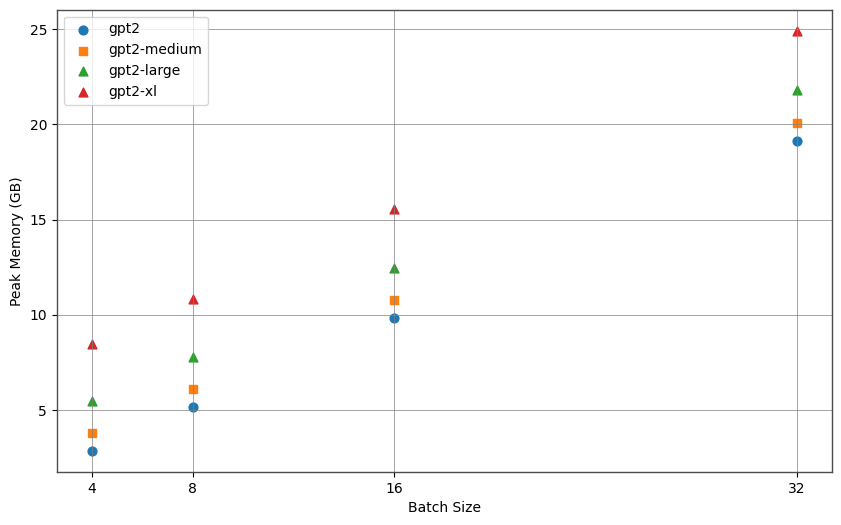

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

x = df_1['batch_size'] // 4

ax.scatter(x, df_1['peak_memory']/1024, color='#1f77b4', marker='o', s=40, label='gpt2')
ax.scatter(x, df_2['peak_memory']/1024, color='#ff7f0e', marker='s', s=40, label='gpt2-medium')
ax.scatter(x, df_3['peak_memory']/1024, color='#2ca02c', marker='^', s=40, label='gpt2-large')
ax.scatter(x, df_4['peak_memory']/1024, color='#d62728', marker='^', s=40, label='gpt2-xl')

ax.set_xlabel("Batch Size")
ax.set_ylabel('Peak Memory (GB)')

ax.set_xticks([1, 2, 4, 8])  
ax.set_xticklabels(['4','8', '16', '32'])  
ax.grid(True, color='gray', linewidth=0.5)
ax.legend()

for spine in ax.spines.values():
    spine.set_edgecolor('#4D4D4D')  
    spine.set_linewidth(1)  

plt.savefig(f"gpt_results/peak_memory_b_m.png")


In [35]:
df

,mode_size,batch_size,sequence_length,running_time,peak_memory
0,gpt2,8,1024,110.911552,5297.565918
1,gpt2,16,1024,110.278486,10060.097168
2,gpt2,32,1024,110.616300,19576.722168
3,gpt2,4,1024,113.501284,2919.909668
4,gpt2-medium,4,1024,306.469946,3851.739746
5,gpt2-medium,8,1024,305.604929,6237.395996
6,gpt2-medium,16,1024,297.962720,11015.927246
7,gpt2-medium,32,1024,296.186319,20564.552246
8,gpt2-large,8,1024,606.648163,7974.147949
9,gpt2-large,4,1024,615.061355,5580.491699


In [41]:
df_5 = df[(df['mode_size']=='gpt2') & (df['batch_size'] == 32)].sort_values(by='sequence_length')
df_5

,mode_size,batch_size,sequence_length,running_time,peak_memory
19,gpt2,32,128,83.588598,2916.527832
18,gpt2,32,256,86.014560,5294.560059
17,gpt2,32,512,91.828460,10058.093262
2,gpt2,32,1024,110.616300,19576.722168


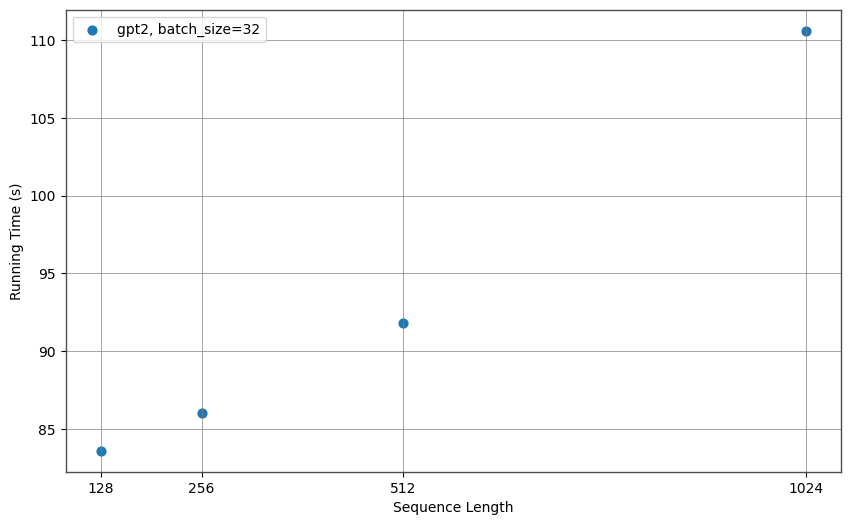

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

x = df_1['batch_size'] // 4

ax.scatter(x, df_5['running_time'], color='#1f77b4', marker='o', s=40, label='gpt2, batch_size=32')
# ax.scatter(x, df_2['running_time'], color='#ff7f0e', marker='s', s=40, label='seq_length=256')
# ax.scatter(x, df_3['running_time'], color='#2ca02c', marker='^', s=40, label='seq_length=512')
# ax.scatter(x, df_4['running_time'], color='#d62728', marker='^', s=40, label='seq_length=1024')

ax.set_xlabel("Sequence Length")
ax.set_ylabel('Running Time (s)')

ax.set_xticks([1, 2, 4, 8])  
ax.set_xticklabels(['128','256', '512', '1024'])  
ax.grid(True, color='gray', linewidth=0.5)
ax.legend()

for spine in ax.spines.values():
    spine.set_edgecolor('#4D4D4D')  
    spine.set_linewidth(1)  

plt.savefig(f"gpt_results/running_time_s.png")


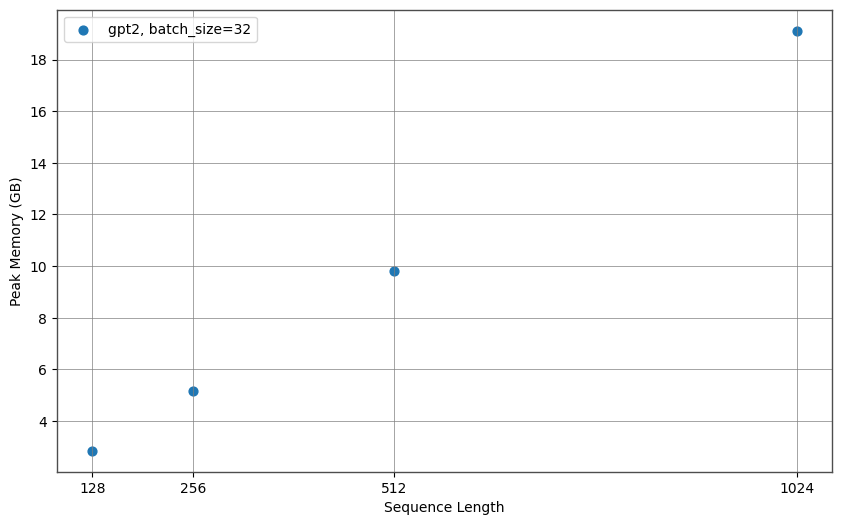

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))

x = df_1['batch_size'] // 4

ax.scatter(x, df_5['peak_memory']/1024, color='#1f77b4', marker='o', s=40, label='gpt2, batch_size=32')


ax.set_xlabel("Sequence Length")
ax.set_ylabel('Peak Memory (GB)')

ax.set_xticks([1, 2, 4, 8])  
ax.set_xticklabels(['128','256', '512', '1024'])  
ax.grid(True, color='gray', linewidth=0.5)
ax.legend()

for spine in ax.spines.values():
    spine.set_edgecolor('#4D4D4D')  
    spine.set_linewidth(1)  

plt.savefig(f"gpt_results/peak_memory_s.png")


In [54]:
df_6 = df[(df['mode_size']=='gpt2') & (df['batch_size']==32) & (df['sequence_length']==1024)].sort_values(by='n_group')
df_6

,mode_size,batch_size,sequence_length,running_time,peak_memory,n_group
2,gpt2,32,1024,110.616300,19576.722168,1
19,gpt2,32,1024,104.660224,19542.669434,4
20,gpt2,32,1024,104.348858,19531.413574,6
21,gpt2,32,1024,103.105021,19526.907715,12


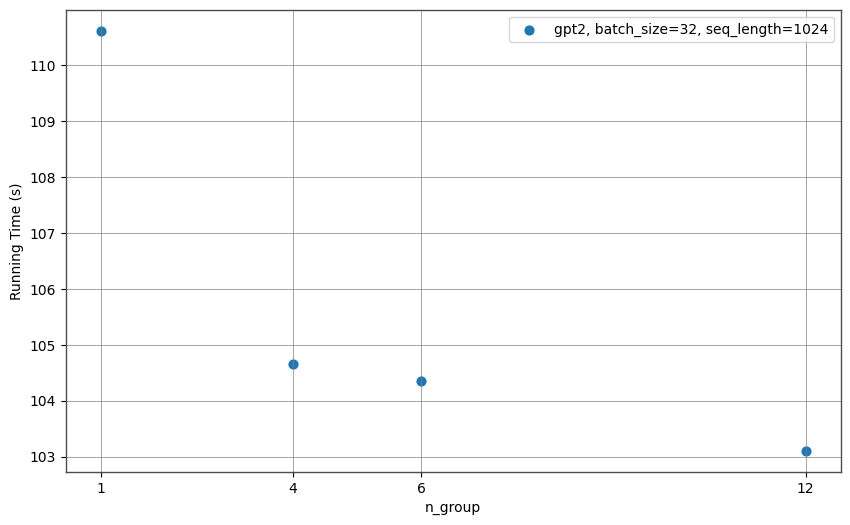

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))

x = [1, 4, 6, 12]

ax.scatter(x, df_6['running_time'], color='#1f77b4', marker='o', s=40, label='gpt2, batch_size=32, seq_length=1024')
# ax.scatter(x, df_2['running_time'], color='#ff7f0e', marker='s', s=40, label='seq_length=256')
# ax.scatter(x, df_3['running_time'], color='#2ca02c', marker='^', s=40, label='seq_length=512')
# ax.scatter(x, df_4['running_time'], color='#d62728', marker='^', s=40, label='seq_length=1024')

ax.set_xlabel("n_group")
ax.set_ylabel('Running Time (s)')

ax.set_xticks(x)  
ax.set_xticklabels(['1','4', '6', '12'])  
ax.grid(True, color='gray', linewidth=0.5)
ax.legend()

for spine in ax.spines.values():
    spine.set_edgecolor('#4D4D4D')  
    spine.set_linewidth(1)  

plt.savefig(f"gpt_results/running_time_g.png")


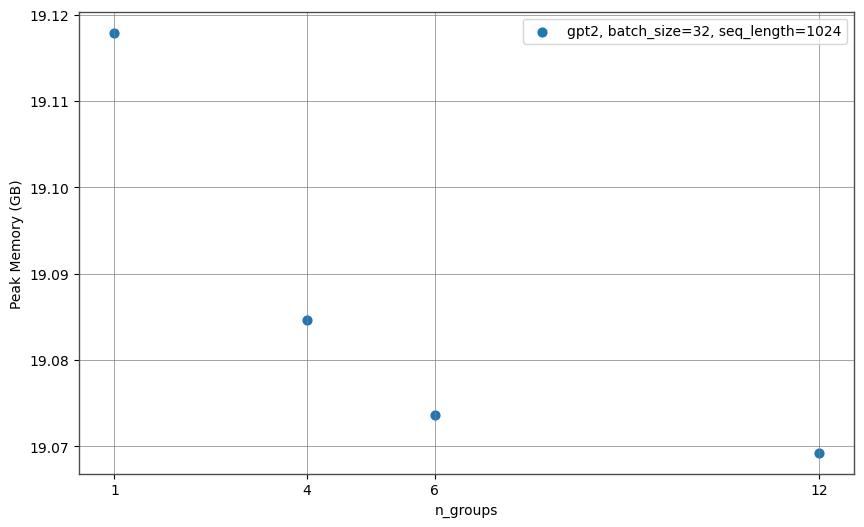

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))

x = [1, 4, 6, 12]

ax.scatter(x, df_6['peak_memory']/1024, color='#1f77b4', marker='o', s=40, label='gpt2, batch_size=32, seq_length=1024')
# ax.scatter(x, df_2['running_time'], color='#ff7f0e', marker='s', s=40, label='seq_length=256')
# ax.scatter(x, df_3['running_time'], color='#2ca02c', marker='^', s=40, label='seq_length=512')
# ax.scatter(x, df_4['running_time'], color='#d62728', marker='^', s=40, label='seq_length=1024')

ax.set_xlabel("n_groups")
ax.set_ylabel('Peak Memory (GB)')

ax.set_xticks(x)  
ax.set_xticklabels(['1','4', '6', '12'])  
ax.grid(True, color='gray', linewidth=0.5)
ax.legend()

for spine in ax.spines.values():
    spine.set_edgecolor('#4D4D4D')  
    spine.set_linewidth(1)  

plt.savefig(f"gpt_results/peak_memory_g.png")
